In [91]:
import numpy as np
from constant import *
from utils import *
import matplotlib.pyplot as plt


In [84]:
def euler_one_step(S,I_moins,I_plus,R_moins,R_plus_I,H,U,R_plus_H,D,D_R,i,cst):
    S_1        = S-cst['tau'][i]*S*I_moins*deltaT
    I_moins_1  = I_moins + (cst['tau'][i]*S*I_moins-cst['lambda_1']*I_moins-(cst['gamma_IR']+cst['gamma_IH']+cst['gamma_IU'])*I_moins)*deltaT
    I_plus_1   = I_plus +(cst['lambda_1']*I_moins-(cst['gamma_IR']+cst['gamma_IH']+cst['gamma_IU'])*I_plus)*deltaT
    R_moins_1  = R_moins +(cst['gamma_IR']*I_moins-cst['lambda_2']*R_moins)*deltaT
    R_plus_I_1 = R_plus_I + (cst['gamma_IR']*I_plus+cst['lambda_2']*R_moins)*deltaT
    H_1        = H + (cst['gamma_IH']*(I_moins + I_plus)-(cst['gamma_HR']+cst['gamma_HD']+cst['gamma_HU'])*H)*deltaT
    U_1        = U + (cst['gamma_IU']*(I_moins + I_plus)+cst['gamma_HU']*H-(cst['gamma_UR'] + cst['gamma_UD'])*U)*deltaT
    R_plus_H_1 = R_plus_H+ (cst['gamma_HR']*H+cst['gamma_UR']*U)*deltaT
    D_1        = D + (cst['gamma_UD']*U+cst['gamma_HD']*H)*deltaT  
    D_R_1      = D_R +((cst['lambda_1']+cst['gamma_IH']+cst['gamma_IU'])*I_moins-D_R)*deltaT
    
    
    return(S_1,I_moins_1,I_plus_1,R_moins_1,R_plus_I_1,H_1,U_1,R_plus_H_1,D_1,D_R_1)


def resolution_systeme(set_size, deltaT,cst):
    Res = np.zeros((N_VARIABLE,set_size))
    Res[0,0] = cst['S_0'] - cst['I_moins_0']
    Res[1,0] = cst['I_moins_0']
    
    for i in range(1,set_size):
        Res[:,i] = euler_one_step(Res[0,i-1],Res[1,i-1],Res[2,i-1],Res[3,i-1],Res[4,i-1],Res[5,i-1],Res[6,i-1],Res[7,i-1],Res[8,i-1],Res[9,i-1],i,cst)
 
    return Res


In [85]:
def Monte_Carlo(M):
    peak_value,peak_day = [],[]
    
    for i in range(M):
        cst = init_constant()
        try : 
            results = resolution_systeme(set_size,deltaT,cst)
            peak_value.append(np.max(results[6,:]))
            peak_day.append(int(np.argmax(list(results[6,:]))*deltaT))
        except:
            print(f"Try n°{i} failed")
    return peak_value,peak_day
    

In [89]:
a = Monte_Carlo(10000)

<ipython-input-84-eec21e7d58d8>:2: RuntimeWarning: overflow encountered in double_scalars
  S_1        = S-cst['tau'][i]*S*I_moins*deltaT
<ipython-input-84-eec21e7d58d8>:3: RuntimeWarning: overflow encountered in double_scalars
  I_moins_1  = I_moins + (cst['tau'][i]*S*I_moins-cst['lambda_1']*I_moins-(cst['gamma_IR']+cst['gamma_IH']+cst['gamma_IU'])*I_moins)*deltaT
<ipython-input-84-eec21e7d58d8>:3: RuntimeWarning: invalid value encountered in double_scalars
  I_moins_1  = I_moins + (cst['tau'][i]*S*I_moins-cst['lambda_1']*I_moins-(cst['gamma_IR']+cst['gamma_IH']+cst['gamma_IU'])*I_moins)*deltaT
<ipython-input-84-eec21e7d58d8>:5: RuntimeWarning: invalid value encountered in double_scalars
  R_moins_1  = R_moins +(cst['gamma_IR']*I_moins-cst['lambda_2']*R_moins)*deltaT
<ipython-input-84-eec21e7d58d8>:6: RuntimeWarning: invalid value encountered in double_scalars
  R_plus_I_1 = R_plus_I + (cst['gamma_IR']*I_plus+cst['lambda_2']*R_moins)*deltaT


In [101]:
peak_value,peak_day = a[0],a[1]

In [102]:
peak_value=np.array(peak_value)
peak_day  =np.array(peak_day)

(array([ 88.,  38.,  14.,  25.,  13.,  21.,  12.,   6.,  14.,   6.,   8.,
          7.,  11.,  11.,   7.,   7.,   6.,   6.,   8.,  10.,   5.,   7.,
         10.,   6.,   7.,   8.,  13.,   8.,   9.,   8.,   8.,   9.,   3.,
          7.,  13.,  10.,   9.,  12.,   7.,  11.,  16.,   9.,   8.,  11.,
         15.,  15.,  16.,  18.,  24.,  17.,  16.,  26.,  22.,  24.,  23.,
         28.,  30.,  46.,  40.,  35.,  37.,  38.,  46.,  60.,  62.,  71.,
         80.,  73.,  85.,  96., 108., 109., 145., 153., 193., 235., 247.,
        265., 289., 305., 352., 323., 409., 465., 435., 429., 407., 417.,
        471., 425., 410., 362., 347., 326., 245., 183., 176., 116.,  48.,
         18.]),
 array([1.41975647e+03, 1.69630903e+05, 3.37842050e+05, 5.06053196e+05,
        6.74264343e+05, 8.42475489e+05, 1.01068664e+06, 1.17889778e+06,
        1.34710893e+06, 1.51532008e+06, 1.68353122e+06, 1.85174237e+06,
        2.01995351e+06, 2.18816466e+06, 2.35637581e+06, 2.52458695e+06,
        2.69279810e+06, 2.8610

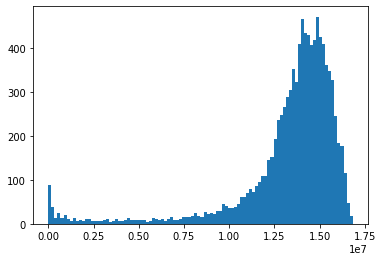

In [106]:
plt.hist(peak_value,bins = 100)

(array([  1.,  11.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  78., 387.,
          0., 744.,   0., 774.,   0., 781.,   0., 653.,   0., 540., 540.,
          0., 522.,   0., 494.,   0., 435.,   0., 404., 374.,   0., 345.,
          0., 328.,   0., 285.,   0., 290.,   0., 261., 209.,   0., 195.,
          0., 197.,   0., 181.,   0., 153., 113.,   0., 106.,   0., 106.,
          0.,  90.,   0.,  82.,   0.,  71.,  53.,   0.,  41.,   0.,  38.,
          0.,  28.,   0.,  13.,  15.,   0.,  17.,   0.,  11.,   0.,   2.,
          0.,  12.,   0.,   6.,   7.,   0.,   3.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.]),
 array([ 1.  ,  1.55,  2.1 ,  2.65,  3.2 ,  3.75,  4.3 ,  4.85,  5.4 ,
         5.95,  6.5 ,  7.05,  7.6 ,  8.15,  8.7 ,  9.25,  9.8 , 10.35,
        10.9 , 11.45, 12.  , 12.55, 13.1 , 13.65, 14.2 , 14.75, 15.3 ,
        15.85, 16.4 , 16.95, 17.5 , 18.05, 18.6 , 19.15, 19.7 , 20.25,
        20.8 , 21.35, 21.9 , 22.45

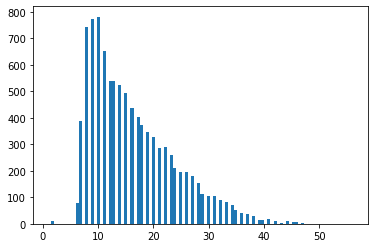

In [107]:

plt.hist(peak_day,bins = 100)